<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/Classificationmin__Code_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 4 min_impurity_decrease

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#HW4

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [ ]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
yes    9
no     5
Name: default, dtype: int64

Gini Impurity of the class is 0.459


In [ ]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')


Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [ ]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


#test iris

In [ ]:
df2 = df1

In [ ]:
df2 = df1.replace({'yes':1,'no':0,'youth':1,'middle_age':2,'senior':3,'low':1,'medium':2,'high':3,'fair':1,'excellent':2})

In [ ]:
X = df2.values[:,:-1]
y = df2.values [:,-1]

In [ ]:
min_impurity_decrease_value = 0.09  # Example value, adjust based on your needs
clf = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease_value, random_state=42)

In [ ]:
model = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease_value, random_state=42)

In [ ]:
model.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.09, random_state=42)

In [ ]:
predictions =model.predict(X)

In [ ]:
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.71%


In [ ]:
from sklearn import tree

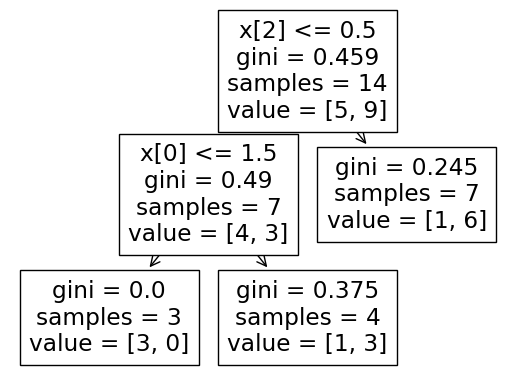

In [ ]:
tree.plot_tree(model);

TypeError: can only concatenate str (not "numpy.int64") to str

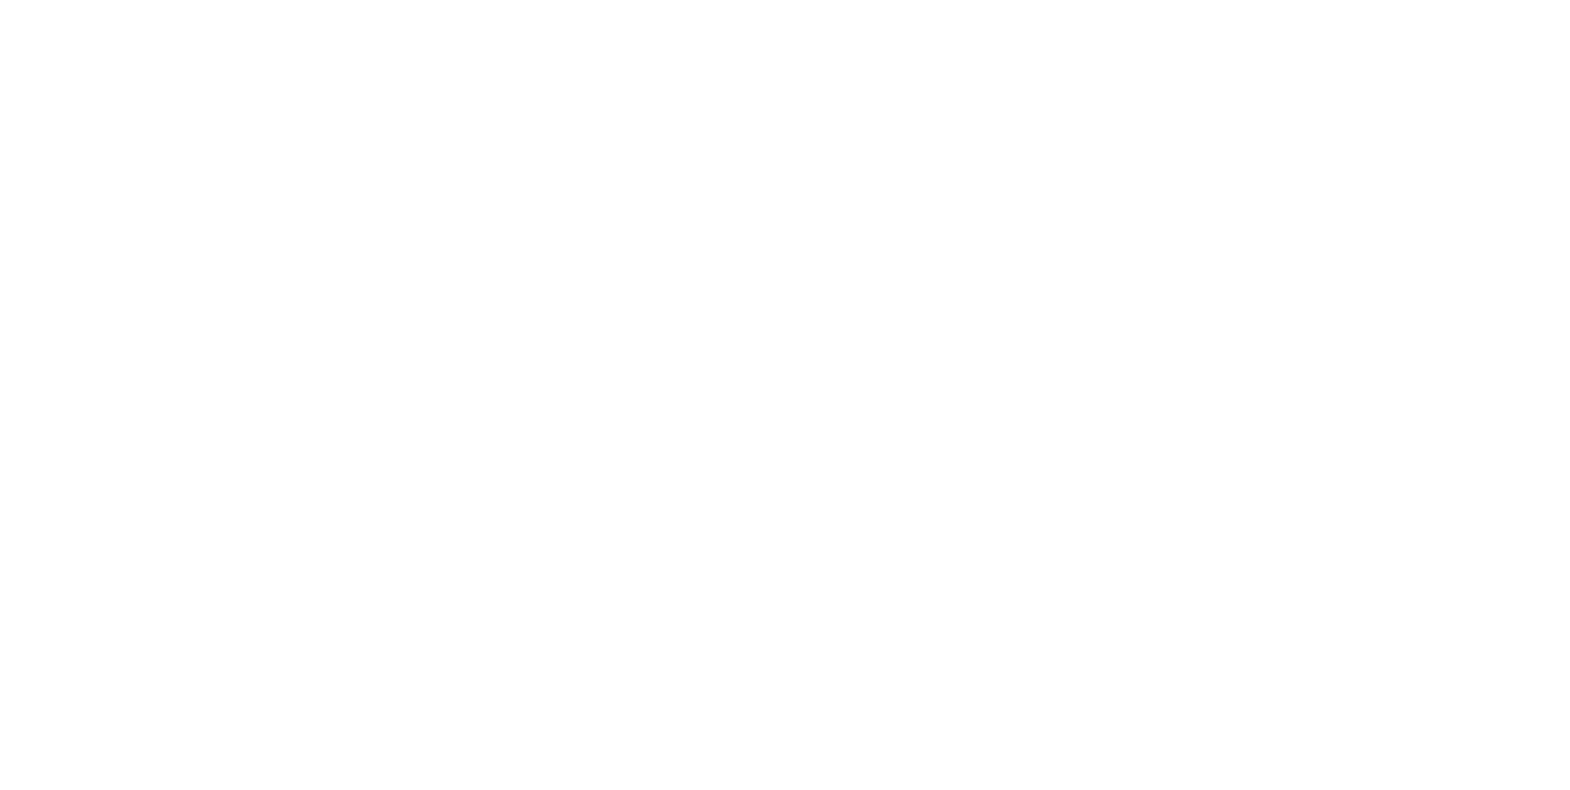

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `clf` is your trained DecisionTreeClassifier model from the previous example

plt.figure(figsize=(20,10))
plot_tree(model,
          filled=True,
          rounded=True,
          class_names=y,
          feature_names=X)
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load a dataset (for illustration, we use the Iris dataset which has 3 classes)
X = df1.values[:,:-1]
y = df1.values [:,-1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree Classifier with a minimum impurity decrease
# Adjust the `min_impurity_decrease` value as per your requirement
min_impurity_decrease_value = 0.01  # Example value, adjust based on your needs
clf = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease_value, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `clf` is your trained DecisionTreeClassifier model from the previous example

plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=data.target_names,
          feature_names=data.feature_names)
plt.show()
